# MTH3302 : Méthodes probabilistes et statistiques pour l'I.A.

Jonathan Jalbert<br/>
Professeur agrégé au Département de mathématiques et de génie industriel<br/>
Polytechnique Montréal<br/>


# TD2 - Régression linéaire

Ce TD concerne la régression linéaire (Chapitre 2 du cours). À la fin de ce TD, vous devriez être avoir été en mesure de :
- Estimer les coefficients des paramètres de la régression linéaire simple avec la méthode des moindres carrés.
- Estimer les coefficients des paramètres de la régression linéaire multiple avec la méthode des moindres carrés.
- Calculer le coefficient de détermination.
- Sélectionner le meilleur modèle unidimensionnel.
- Calculer avec des méthodes numériquement stables les coefficients de régression.

# Contexte : Pourcentage de matière grasse

Le pourcentage de matière grasse d'un patient est une mesure largement utilisée en médecine pour estimer les facteurs de risque de plusieurs maladies. Cette quantité est cependant très difficile à mesurer. La mesure implique en effet d’immerger le patient dans un cylindre gradué rempli d’eau afin de calculer sa masse volumique. Cette procédure est non seulement inconfortable pour le patient mais pratiquement impossible à effectuer dans le bureau du médecin.

Par conséquent, on souhaite savoir si on peut prédire le pourcentage de gras Y avec trois mesures beaucoup plus simples à obtenir :

- $x_1$ : l'épaisseur des plis de la peau des triceps (en mm) ;<br/>
- $x_2$ : le tour de cuisse (en mm) ;<br/>
- $x_3$ : la circonférence du bras en (mm).<br/>

Les mesures du fichier *bodyfat.csv* proviennent de 20 femmes en bonne santé, âgées entre 20 et 34 ans. Ceci est un jeu de données réel.


In [1]:
# Chargement des librairies
using CSV, DataFrames, Distributions, Gadfly, Statistics, LinearAlgebra

# Exercice 1 - Régression linéaire simple

Nous étudierons dans cet exercice la meilleure variable explicative pour le pourcentage de matière grasse.

In [4]:
# Chargement des données
data = CSV.read("../Chapitre 2/Data/bodyfat.csv", DataFrame)
first(data,5)

Row,Triceps,Thigh,Midarm,Bodyfat
,Float64,Float64,Float64,Float64
1,19.5,43.1,29.1,11.9
2,24.7,49.8,28.2,22.8
3,30.7,51.9,37.0,18.7
4,29.8,54.3,31.1,20.1
5,19.1,42.2,30.9,12.9


## a) Affichage du pourcentage de graisse en fonction des variables explicatives

Tracer les nuages de points du pourcentage de graisse en fonction des variables explicatives. 

- Est-ce qu'une relation linéaire semble appropriée pour chacune de ces trois variables ? 
- Quelle variable vous semble la meilleure et pour quelle raison ?

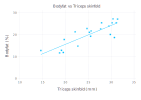

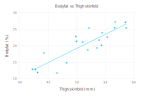

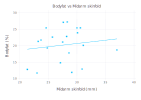

In [30]:
# poucentage de bodyfat en fonction des variables tricep thigh midarm
p1 = plot(data, x=:Triceps, y=:Bodyfat, Geom.point, Geom.smooth(method=:lm), 
    Guide.xlabel("Triceps skinfold (mm)"), Guide.ylabel("Bodyfat (%)"), 
    Guide.title("Bodyfat vs Triceps skinfold"))
p2 = plot(data, x=:Thigh, y=:Bodyfat, Geom.point, Geom.smooth(method=:lm), 
    Guide.xlabel("Thigh skinfold (mm)"), Guide.ylabel("Bodyfat (%)"), 
    Guide.title("Bodyfat vs Thigh skinfold"))
p3 = plot(data, x=:Midarm, y=:Bodyfat, Geom.point, Geom.smooth(method=:lm), 
    Guide.xlabel("Midarm skinfold (mm)"), Guide.ylabel("Bodyfat (%)"), 
    Guide.title("Bodyfat vs Midarm skinfold"))
# draw the 3 plots in a grid
# lets make a gris with the 3 plots
display(p1)
display(p2)
display(p3)

## b) Estimation des paramètres de la régression linéaire simple avec $x₁$


In [34]:
# now we want to find the best parameters β̂₀ and β̂₁ for p1
X = hcat(ones(size(data,1)), data.Triceps)
y = data.Bodyfat
β̂ = X \ y

2-element Vector{Float64}:
 -1.4961046410369048
  0.8571865102168307

In [ ]:
# Vous devriez obtenir β̂₀ = -1.50 et β̂₁ = 0.857.

## c) Affichage de la droite de régression obtenue

Superposez au nuage de points précédent la droite de régression estimée. Vous pouvez utiliser la géométrie `Geom.abline()` de *Gadfly*. 

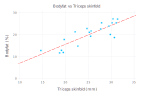

In [45]:
p1 = plot(data, x=:Triceps, y=:Bodyfat, Geom.point, 
intercept=[β̂[1]], slope=[β̂[2]], Geom.abline(color="red", style=:dash),
Guide.xlabel("Triceps skinfold (mm)"), Guide.ylabel("Bodyfat (%)"), 
    Guide.title("Bodyfat vs Triceps skinfold"))

## d) Calcul du coefficient de détermination

Calculez le coefficient de détermination de la régression.

In [50]:
# coefficient of determination R²
ŷ = X * β̂
SS_tot = sum((y .- mean(y)).^2)
SS_res = sum((ŷ .- mean(y)).^2)
R² = SS_res / SS_tot
println("R² = ", R²)

R² = 0.7110966155559694


In [ ]:
# Vous devriez obtenir R² = 0.7110966155559691

## e) Interprétation du modèle de régression

Donnez une interprétation de 
- de l'estimation de l'ordonnée à l'origine $β̂₀$ ;
- de l'estimation de la pente $β̂₁$ ;
- du coefficient de détermination $R²$ .

In [ ]:
coefficient est R² = 0.7110966155559691, ce qui signifie que 71.1% de la variance de Bodyfat est expliquée par le modèle linéaire avec Triceps comme variable explicative.
ordonnee à l'origine β̂₀ = -1.50 et la pente β̂₁ = 0.857. Odonnée à l'origine est probalement faux, pcq on a pas assez de données
pente veut dire que pour chaque augmentation de 1 mm de Triceps, Bodyfat augmente en moyenne de 0.857%.

## f)  Identification du meilleur modèle unidimensionnel

Identifiez lequel parmi les trois modèles de régression linéaire simple est le meilleur pour prédire le pourcentage de matière grasse d'un patient ? Justifier quantitativement votre réponse. 

Indice : calculez le coefficient de détermination de chacun des modèles et sélectionnez celui ayant le plus grand.

In [55]:
X2 = hcat(ones(size(data,1)), data.Thigh)
X3 = hcat(ones(size(data,1)), data.Midarm)

β̂2 = X2 \ y
β̂3 = X3 \ y

# coefficient of determination R²
ŷ2 = X2 * β̂2
ŷ3 = X3 * β̂3
SS_res2 = sum((ŷ2 .- mean(y)).^2)
SS_res3 = sum((ŷ3 .- mean(y)).^2)
R²_2 = SS_res2 / SS_tot
R²_3 = SS_res3 / SS_tot

# ordered list of R² values
println("R² for Thigh X2 = ", R²_2)
println("R² for Triceps X1 = ", R²)
println("R² for Midarm X3 = ", R²_3)

R² for Thigh X2 = 0.7710414083275698
R² for Triceps X1 = 0.7110966155559694
R² for Midarm X3 = 0.02029030188132418


# Exercice 2 - Régression linéaire multiple

Dans cet exercice, les trois variables explicatives seront utilisées pour prédire le pourcentage de matière grasse d'un patient.

## a) Estimation des paramètres de la régression linéaire multiple

En utilisant les trois variables explicatives, estimez les paramètres de la régression linéaire multiple avec la méthode des moindres carrés.

In [67]:
# multiple linear regression with x1 = Triceps, x2 = Thigh, x3 = Midarm
X_multi = hcat(ones(size(data,1)), data.Triceps, data.Thigh)
β̂_multi = X_multi \ y

3-element Vector{Float64}:
 -19.17424564278459
   0.22235259110975242
   0.6594217964579303

In [ ]:
# Vous devriez obtenir β̂ = [117.0846947802495, 4.334092008375274, -2.856847936298782, -2.186060251693594]

## b) Calcul du coefficient de détermination 


Calculez le coefficient de détermination et comparez-le à ceux de la question 1 (f). Pouvez-vous conclure que ce modèle est meilleur ?

In [68]:
# find R² for the multiple linear regression
ŷ_multi = X_multi * β̂_multi
SS_res_multi = sum((ŷ_multi .- mean(y)).^2)
R²_multi = SS_res_multi / SS_tot
println("R² for multiple linear regression = ", R²_multi)

R² for multiple linear regression = 0.7780518353049863


In [ ]:
# Vous devriez obtenir R² = 0.8013585508623703

## c) Calcul d'une prédiction

Si une patiente possède les caractérisques suivantes :

 - $x_1$ = 25.0
 - $x_2$ = 51.0
 - $x_3$ = 27.5
 
 Quelle est la meilleure prédiction pour son pourcentagede pourcentage de graisse ?

In [66]:
# calculate y for a person with triceps = 25, thigh = 51, midarm = 27.5
X_new = hcat(1, 25, 51, 27.5)
y_new = X_new * β̂_multi

1-element Vector{Float64}:
 19.621093316834425

In [ ]:
# Vous devriez obtenir 19.6

## d) Calcul des coefficients de régression à l'aide de la décomposition QR

Pour rendre les calculs numériques stables et efficaces, les coefficients de régressions sont généralement calculés à l'aide de la décomposition QR de la matrice de structure X, *i.e.*
$$ X = QR.$$

On peut montrer (Exercice 1 de la fin du chapitre 2 des notes de cours) que 

$$ β̂ = R^{-1} Q^\top y.$$

L'opération de la décomposition QR et de la résolution du système linéaire s'effectue en une commande à l'aide de l'opérateur `\`.

Estimez les coefficients de régression avec la commande `β̂ = X \ y`. Obtenez-vous les mêmes résultats ?


In [ ]:
# oups

Pour de grands jeux de données, cette solution est beaucoup plus performante et précise. Pour de petits jeux de données tel que celui-ci, ce n'est pas plus rapide de passer par la décomposition QR mais ça demeure plus précis numériquement.